## INITIAL DATA ANALYSIS FOR ALL DATA SETS

In [1]:
import pandas as pd

In [6]:
def df_info(df):
    list_col_names=list(df.columns)
    list_col_types=[type(col) for col in df.iloc[0, :]]
    list_col_null_count=[df[col].isnull().sum() for col in list_col_names]
    list_col_unique_count=[df[col].nunique() for col in list_col_names]
    list_col_unique_items=[list(df[col].value_counts().to_dict().keys())[:20] for col in list_col_names]
    df_col_info=pd.DataFrame({'col_name':list_col_names,
                             'col_type':list_col_types,
                             'col_null_count':list_col_null_count,
                             'col_unique_count':list_col_unique_count,
                             'col_unique_items': list_col_unique_items})
    
    list_col_memory_usage=[df[col].memory_usage() for col in list_col_names]
    total_memory_usage = sum(list_col_memory_usage)
    return df_col_info, total_memory_usage

In [8]:
df_campaign_data=pd.read_csv('campaign_data.csv')
df_coupon_item_mapping=pd.read_csv('coupon_item_mapping.csv')
df_customer_demographics=pd.read_csv('customer_demographics.csv')
df_item_data=pd.read_csv('item_data.csv')
df_train=pd.read_csv('train.csv')
df_customer_transaction_data=pd.read_csv('customer_transaction_data.csv')

In [9]:
##DATA ANALYSIS FOR CAMPAIGN DATA
df_campaign_data_info,df_campaign_data_memory=df_info(df_campaign_data)

In [11]:
print(f'{df_campaign_data.shape[0]} rows x{df_campaign_data.shape[1]} columns| {df_campaign_data_memory:.2f} MB approx memory usage\n{df_campaign_data_info.to_string()}')

28 rows x4 columns| 1408.00 MB approx memory usage
        col_name               col_type  col_null_count  col_unique_count                                                                                                                                                                                          col_unique_items
0    campaign_id  <class 'numpy.int64'>               0                28                                                                                                                                   [24, 25, 27, 28, 29, 30, 2, 1, 4, 5, 3, 6, 7, 8, 9, 10, 12, 11, 13, 16]
1  campaign_type          <class 'str'>               0                 2                                                                                                                                                                                                    [Y, X]
2     start_date          <class 'str'>               0                25  [21/10/13, 16/09/13, 22/04/13, 28/01/13, 25/08

In [12]:
##DATA ANALYSIS FOR COUPON_ITEM_MAPPING
df_coupon_item_mapping_info,df_coupon_item_mapping_memory=df_info(df_coupon_item_mapping)
print(f'{df_coupon_item_mapping.shape[0]} rows x{df_coupon_item_mapping.shape[1]} columns| {df_coupon_item_mapping_memory:.2f} MB approx memory usage\n{df_coupon_item_mapping_info.to_string()}')

92663 rows x2 columns| 1482864.00 MB approx memory usage
    col_name       col_type  col_null_count  col_unique_count                                                                                                                           col_unique_items
0  coupon_id  <class 'int'>               0              1116                                                            [32, 23, 22, 31, 33, 24, 8, 6, 29, 20, 21, 30, 7, 43, 42, 9, 37, 549, 270, 562]
1    item_id  <class 'int'>               0             36289  [56523, 26458, 52650, 22290, 30410, 16183, 37814, 29025, 45662, 12223, 63983, 21792, 1386, 28958, 64291, 64292, 58294, 32732, 52492, 945]


In [13]:
##DATA ANALYSIS FOR customer_demographics
df_customer_demographics_info,df_customer_demographics_memory=df_info(df_customer_demographics)
print(f'{df_customer_demographics.shape[0]} rows x{df_customer_demographics.shape[1]} columns| {df_customer_demographics_memory:.2f} MB approx memory usage\n{df_customer_demographics_info.to_string()}')

760 rows x7 columns| 43456.00 MB approx memory usage
         col_name               col_type  col_null_count  col_unique_count                                                                                                       col_unique_items
0     customer_id  <class 'numpy.int64'>               0               760  [1, 1056, 1033, 1036, 1045, 1046, 1047, 1051, 1053, 1054, 1055, 1057, 1026, 1058, 1061, 1062, 1063, 1064, 1067, 1068]
1       age_range          <class 'str'>               0                 6                                                                               [46-55, 36-45, 26-35, 70+, 56-70, 18-25]
2  marital_status          <class 'str'>             329                 2                                                                                                      [Married, Single]
3          rented  <class 'numpy.int64'>               0                 2                                                                                                 

In [14]:
## DATA ANALYSIS FOR ITEM_DATA
df_item_data_info,df_item_data_memory=df_info(df_item_data)
print(f'{df_item_data.shape[0]} rows x{df_item_data.shape[1]} columns| {df_item_data_memory:.2f} MB approx memory usage\n{df_item_data_info.to_string()}')

74066 rows x4 columns| 2370624.00 MB approx memory usage
     col_name               col_type  col_null_count  col_unique_count                                                                                                                                                                                                                                   col_unique_items
0     item_id  <class 'numpy.int64'>               0             74066                                                                                                           [1, 49331, 49383, 49382, 49381, 49380, 49379, 49378, 49377, 49376, 49375, 49374, 49373, 49372, 49371, 49370, 49369, 49384, 49385, 49386]
1       brand  <class 'numpy.int64'>               0              5528                                                                                                                                              [56, 686, 1, 4700, 1262, 487, 619, 946, 4467, 1124, 172, 278, 602, 89, 158, 1470, 971, 866, 771, 808]
2

In [15]:
## DATA ANALYSIS FOR TRAIN DATASET
df_train_info,df_train_memory=df_info(df_train)
print(f'{df_train.shape[0]} rows x{df_train.shape[1]} columns| {df_train_memory:.2f} MB approx memory usage\n{df_train_info.to_string()}')

78369 rows x5 columns| 3135400.00 MB approx memory usage
            col_name       col_type  col_null_count  col_unique_count                                                                                                                          col_unique_items
0                 id  <class 'int'>               0             78369  [1, 85767, 85779, 85778, 85776, 85774, 85770, 85769, 85768, 85765, 85817, 85764, 85762, 85758, 85755, 85754, 85753, 85752, 85781, 85786]
1        campaign_id  <class 'int'>               0                18                                                                           [13, 8, 30, 26, 29, 9, 11, 12, 5, 10, 7, 4, 2, 28, 3, 27, 1, 6]
2          coupon_id  <class 'int'>               0               866                                    [705, 470, 691, 468, 1043, 658, 431, 759, 754, 896, 989, 689, 934, 279, 694, 578, 920, 672, 1063, 744]
3        customer_id  <class 'int'>               0              1428                           [1463, 590, 189

In [17]:
## DATA ANALYSIS FOR CUSTOMER TRANSACTION
df_customer_transaction_data_info,df_customer_transaction_data_memory=df_info(df_customer_transaction_data)
print(f'{df_customer_transaction_data.shape[0]} rows x{df_customer_transaction_data.shape[1]} columns| {df_customer_transaction_data_memory:.2f} MB approx memory usage\n{df_customer_transaction_data_info.to_string()}')

1324566 rows x7 columns| 74176592.00 MB approx memory usage
          col_name                 col_type  col_null_count  col_unique_count                                                                                                                                                                                                                                  col_unique_items
0             date            <class 'str'>               0               549  [2012-09-03, 2012-10-03, 2012-11-15, 2012-09-13, 2012-10-11, 2012-10-19, 2012-10-25, 2012-11-23, 2013-01-24, 2012-12-07, 2013-02-15, 2012-07-27, 2013-03-15, 2012-12-14, 2012-11-02, 2012-12-21, 2012-08-10, 2012-12-13, 2013-01-11, 2012-11-16]
1      customer_id    <class 'numpy.int64'>               0              1582                                                                                                                                      [1555, 711, 464, 1475, 1011, 911, 1466, 627, 60, 898, 934, 239, 1485, 161, 626, 208, 1444

## A SUMMARY CONTAINING THE UNDERSTANDING OF DATA,IMPORTANT FIELDS,PLAN FOR THE NEXT STEP

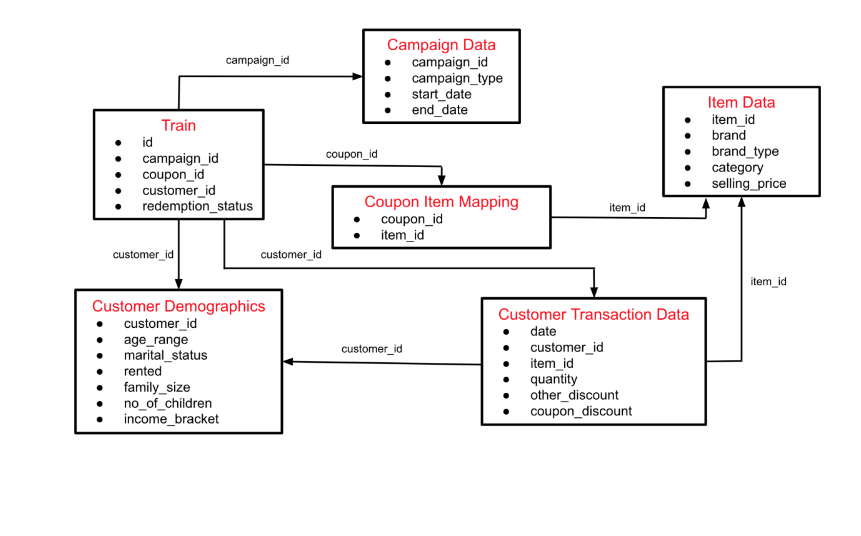

The data sets are connected through each other as shown in above diagram.

The important fields are the ones that connect each data set and are written above the arrow.

The next step is data cleaning and transformation.Handling null values and making the data prepare for further process.



## DATA CLEANING AND TRANSFORMATION

### Campaign data 

In [19]:
#obtaining last 5 rows as sample
df_campaign_data.tail(5)

,campaign_id,campaign_type,start_date,end_date
23,30,X,19/11/12,04/01/13
24,29,Y,08/10/12,30/11/12
25,28,Y,16/09/12,16/11/12
26,27,Y,25/08/12,27/10/12
27,26,X,12/08/12,21/09/12


In [22]:
#checking for any null values in data set
df_campaign_data.isnull().sum().sum()

0

In [24]:
#Data Standardization and Normalization is a common practice in machine learning. 
df_campaign_data.duplicated().sum()

0

   #### VERIFY AND ENRICH
After removing null, duplicate, and incorrect values, we should verify the dataset and validate its accuracy. In this step, we have to check that the data cleaned so far is making any sense. If the data is incomplete we have to enrich the data again by data gathering activities like approaching the clients again, re-interviewing people, etc. Completeness is a little more challenging to achieve accuracy or quality in the dataset.
   #### Export dataset
This is the last step of the data cleaning process. After performing all the above operations, the data is transformed into clean the dataset and it is ready to export for the next process in Data Science or Data Analysis.

### Coupon_item_mapping dataset

In [29]:
#obtaining last 5 rows as sample
df_coupon_item_mapping.tail(5)

,coupon_id,item_id
92658,32,69268
92659,32,68502
92660,32,68612
92661,33,71390
92662,31,70030


In [30]:
#checking for any null values in data set
df_coupon_item_mapping.isnull().sum().sum()

0

In [31]:
#Data Standardization and Normalization is a common practice in machine learning. 
df_coupon_item_mapping.duplicated().sum()

0

### customer_demographic dataset

In [34]:
#obtaining last 5 rows as sample
df_customer_demographics.tail(5)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5
759,1581,26-35,NaN,0,3,1,1


In [37]:
#checking for any null values in data set
df_customer_demographics.isnull().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

Since the dataset contains null values we can fill the null values with some desired value with .fillna() function.

In [38]:
#Data Standardization and Normalization is a common practice in machine learning. 
df_customer_demographics.duplicated().sum()

0

### Item_data dataset

In [41]:
#obtaining last 5 rows as sample
df_item_data.tail(5)

,item_id,brand,brand_type,category
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical
74065,74066,5194,Established,Grocery


In [44]:
#checking for any null values in data set
df_item_data.isnull().sum().sum()

0

In [43]:
#Data Standardization and Normalization is a common practice in machine learning. 
df_item_data.duplicated().sum()

0

### Train dataset

In [48]:
#obtaining last 5 rows as sample
df_train.tail(5)

,id,campaign_id,coupon_id,customer_id,redemption_status
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0
78368,128595,13,681,623,0


In [49]:
#checking for any null values in data set
df_train.isnull().sum().sum()

0

In [50]:
#Data Standardization and Normalization is a common practice in machine learning. 
df_train.duplicated().sum()

0

### Customer_transaction_data dataset

In [53]:
#obtaining last 5 rows as sample
df_customer_transaction_data.tail(5)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0
1324565,2013-06-30,1129,64498,2,489.78,0.00,0.0


In [54]:
#checking for any null values in data set
df_customer_transaction_data.isnull().sum().sum()

0

In [57]:
#Data Standardization and Normalization is a common practice in machine learning. 
df_customer_transaction_data.duplicated().sum()

2916

This dataset contains the duplicated rows.It is always the best practice to make any changes on the copy of the original dataset.So we will make a copy of this data set and drop all the duplicate values in it.

In [58]:
#Making a copy of data set
df_customer_transaction_data_copy=df_customer_transaction_data.copy(deep=True) 

In [59]:
df_customer_transaction_data_copy.duplicated().sum()

2916

In [60]:
#Remoing the duplicates from the copy dataset
df_customer_transaction_data_copy.drop_duplicates(keep='first',inplace=True)

In [61]:
df_customer_transaction_data_copy.duplicated().sum()

0

In [62]:
df_customer_transaction_data.duplicated().sum()

2916

The copied dataset is now free from data redundancy while the original datset reamins untouched.

## ----------------DATA CLEANING AND TRANSFORMATION DONE------------------------

# EXPLORATORY DATA ANALYSIS

### campaign data set

In [63]:
df_campaign_data.shape

(28, 4)

In [65]:
df_campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


This data set has campaign id as integer with no null values and other information can be seen from the above.

In [66]:
df_campaign_data.describe()

,campaign_id
count,28.000000
mean,15.571429
std,9.118271
min,1.000000
25%,7.750000
50%,16.500000
75%,23.250000
max,30.000000


## Finding the correlation
df_campaign_data.corr()

### Coupon_item_mapping

In [68]:
df_coupon_item_mapping.shape

(92663, 2)

In [69]:
df_coupon_item_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [70]:
df_coupon_item_mapping.describe()

,coupon_id,item_id
count,92663.000000,92663.000000
mean,155.967387,36508.613071
std,282.991720,21131.312716
min,1.000000,1.000000
25%,22.000000,18255.500000
50%,30.000000,37955.000000
75%,42.000000,54191.500000
max,1116.000000,74061.000000


In [71]:
df_coupon_item_mapping.corr()

,coupon_id,item_id
coupon_id,1.000000,-0.027016
item_id,-0.027016,1.000000


### Customer_demographic dataset

In [72]:
df_customer_demographics.shape

(760, 7)

In [73]:
df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [74]:
df_customer_demographics.describe()

,customer_id,rented,income_bracket
count,760.000000,760.000000,760.000000
mean,779.201316,0.053947,4.715789
std,459.754429,0.226063,2.258817
min,1.000000,0.000000,1.000000
25%,382.750000,0.000000,3.000000
50%,774.500000,0.000000,5.000000
75%,1187.250000,0.000000,6.000000
max,1581.000000,1.000000,12.000000


In [75]:
df_customer_demographics.corr()

,customer_id,rented,income_bracket
customer_id,1.000000,0.020431,0.071477
rented,0.020431,1.000000,-0.122164
income_bracket,0.071477,-0.122164,1.000000


### Item_data dataset

In [76]:
df_item_data.shape

(74066, 4)

In [78]:
df_item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [79]:
df_item_data.describe()

,item_id,brand
count,74066.000000,74066.000000
mean,37033.500000,1485.560055
std,21381.156856,1537.385673
min,1.000000,1.000000
25%,18517.250000,278.000000
50%,37033.500000,978.000000
75%,55549.750000,2013.000000
max,74066.000000,5528.000000


In [80]:
df_item_data.corr()

,item_id,brand
item_id,1.000000,0.158051
brand,0.158051,1.000000


### Train dataset

In [81]:
df_train.shape

(78369, 5)

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [83]:
df_train.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [84]:
df_train.corr()

,id,campaign_id,coupon_id,customer_id,redemption_status
id,1.000000,0.006443,-0.001067,-0.000088,-0.000328
campaign_id,0.006443,1.000000,0.102046,-0.003556,-0.007548
coupon_id,-0.001067,0.102046,1.000000,0.007551,0.023334
customer_id,-0.000088,-0.003556,0.007551,1.000000,0.011690
redemption_status,-0.000328,-0.007548,0.023334,0.011690,1.000000


### Customer_transaction_data dataset

In [85]:
df_customer_transaction_data.shape

(1324566, 7)

In [86]:
df_customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [89]:
df_customer_transaction_data.describe()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
count,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
mean,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01
std,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03
25%,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00
50%,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00
75%,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00
max,1.582000e+03,7.406600e+04,8.963800e+04,1.780964e+04,0.000000e+00,0.000000e+00


In [88]:
df_customer_transaction_data.corr()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
customer_id,1.000000,0.002864,0.000016,0.004312,-0.004015,-0.001199
item_id,0.002864,1.000000,0.105149,0.126384,-0.051793,-0.031481
quantity,0.000016,0.105149,1.000000,0.672741,-0.056818,0.008266
selling_price,0.004312,0.126384,0.672741,1.000000,-0.246314,-0.080278
other_discount,-0.004015,-0.051793,-0.056818,-0.246314,1.000000,0.109624
coupon_discount,-0.001199,-0.031481,0.008266,-0.080278,0.109624,1.000000


# Merging dataset

In [121]:
df_merged_train_campaign=pd.merge(df_train,df_campaign_data,on='campaign_id',how='left')

#### MERGING TRAIN data AND CAMPAIGN DATASET USING CAMPAIGN ID using left outer join


In [122]:
df_merged_train_campaign.tail(5)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
78364,128587,8,71,1523,0,X,16/02/13,05/04/13
78365,128589,30,547,937,0,X,19/11/12,04/01/13
78366,128590,8,754,1004,0,X,16/02/13,05/04/13
78367,128592,13,134,71,0,X,19/05/13,05/07/13
78368,128595,13,681,623,0,X,19/05/13,05/07/13


#### Merging train
Here we will use outer join as the transaction exist only if the train exist.

In [149]:
df_merged_train_campaign_demo=pd.merge(df_merged_train_campaign,df_customer_demographics,on='customer_id',how='outer')

In [150]:
df_merged_train_campaign_demo.head(3)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,0,1,NaN,5
1,2444,13,513,1053,0,X,19/05/13,05/07/13,46-55,NaN,0,1,NaN,5
2,3651,13,166,1053,0,X,19/05/13,05/07/13,46-55,NaN,0,1,NaN,5


#### Merging customer transaction data
The already merged dataset is merged with customer transaction dataset using left outer join as the transaction will only exist if the train dataset exist

In [151]:
df_merged_train_campaign_demo_trans=pd.merge(df_merge_train_campaign_demo,df_customer_transaction_data_copy,on='customer_id',how='left')

In [152]:
df_merged_train_campaign_demo_trans.tail(3)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,id,campaign_id,coupon_id,redemption_status,campaign_type,start_date,end_date,date,item_id,quantity,selling_price,other_discount,coupon_discount
792429,623,NaN,NaN,NaN,NaN,NaN,NaN,128595.0,13.0,681.0,0.0,X,19/05/13,05/07/13,2013-07-01,45520,1,89.05,-8.90,0.0
792430,623,NaN,NaN,NaN,NaN,NaN,NaN,128595.0,13.0,681.0,0.0,X,19/05/13,05/07/13,2013-07-01,45539,1,142.48,-24.58,0.0
792431,623,NaN,NaN,NaN,NaN,NaN,NaN,128595.0,13.0,681.0,0.0,X,19/05/13,05/07/13,2013-07-03,45539,1,142.48,-24.58,0.0


#### Merging coupon item mapping and item data

In [153]:
df_merged_cim_id=pd.merge(df_coupon_item_mapping,df_item_data,on='item_id',how='outer')

In [154]:
df_merged_cim_id.tail(3)

,coupon_id,item_id,brand,brand_type,category
130437,NaN,74064,5497,Established,Pharmaceutical
130438,NaN,74065,5520,Established,Pharmaceutical
130439,NaN,74066,5194,Established,Grocery


In [ ]:
df_final_merged=pd.merge(df_merged_cim_id,df_merge_train_campaign_demo,on='coupon_id',how='outer')

In [114]:
df_final_merged.head(5)

,coupon_id,item_id,brand,brand_type,category,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,id,campaign_id,redemption_status,campaign_type,start_date,end_date
0,105.0,37,56,Local,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105.0,2360,56,Local,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,105.0,9944,56,Local,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,105.0,13208,56,Local,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105.0,17451,56,Local,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
